**WARNING**
Gridsearch cell takes 10-15 minutes to run. 

Imports

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from bs4 import BeautifulSoup        
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer 
import regex as re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

Read in original (first scrape) relationship csv.

In [2]:
relationship = pd.read_csv('datasets/relationship.csv')
relationship.head()

,Unnamed: 0,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,0,b2nc2f,eganist,[meta] Think of the comments as an inverted Ub...,Since two or three times a week we end up remo...,2019-03-18 20:04:08,52,3153,relationship_advice
1,1,ca66sv,throwawaynocollege01,"Mom had an affair 18 years ago, I [18M] am the...",Pretty much the title. I have no idea how to p...,2019-07-07 12:13:03,5732,21144,relationship_advice
2,2,c9ztfk,thegoodtwin28,UPDATE: I'm thinking of distancing myself from...,Thank you for all the helpful comments.\n\nA l...,2019-07-06 22:52:54,620,8427,relationship_advice
3,3,ca62qi,bigkyrososa,General Advice: You Don't Require Evidence/Con...,Just some general relationship advice after ob...,2019-07-07 11:58:29,39,202,relationship_advice
4,4,ca8eih,grizzythekid,I just found out that my daughter is not my da...,So my SO of 4+ years just confessed that my da...,2019-07-07 16:03:19,83,69,relationship_advice


Read in original (first scrape) dating csv.

In [3]:
dating = pd.read_csv('datasets/dating.csv')
dating.head()

,Unnamed: 0,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,0,c5gnfz,TheYellowRose,[SERIOUS] What are some good ways to build up ...,NaN,2019-06-25 22:28:55,52,104,dating_advice
1,1,c9sy1z,AutoModerator,"Daily Free-for-all Discussion- July 06, 2019",Welcome to /r/dating_advice. Please use this d...,2019-07-06 12:13:58,1,4,dating_advice
2,2,ca6n6n,C0nfusedGiirl,I hate when guys didn't respond and left me gu...,That's getting annoyed and time-wasting!\n\nI ...,2019-07-07 13:08:02,123,348,dating_advice
3,3,ca8zs0,thatviolabinch,"To the right person, you will perfectly make s...","I guess this is kind of obvious, but I wanted ...",2019-07-07 16:56:26,6,52,dating_advice
4,4,c9xmsw,Raziasaur,If you have an unreciprocated crush on a frien...,I can’t tell you how many friendships have bee...,2019-07-06 19:34:47,162,2237,dating_advice


In [4]:
# train = pd.concat(objs=[relationship, dating], axis='rows', ignore_index=True)
# original concatonation on first scrape 

Read in final csv with two scrapes from each subreddit.

In [30]:
train = pd.read_csv("datasets/big_train.csv")

In [31]:
print(train.shape)
train.head()

(3845, 9)


,Unnamed: 0,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,0,cc1xgw,Zxnobia,When is it getting serious?,"Hey, I’m relatively new to dating and therefor...",2019-07-11 21:54:37,1,1,dating_advice
1,1,cc1ro7,kittenlikeunicorn,I am having anxiety about a guy I just started...,"I want to have another date, we’ve already wen...",2019-07-11 21:41:30,1,1,dating_advice
2,2,cc1ppg,whyisthisthrow,"I feel like shit, and a moron, with nobody to ...",I met this girl around 4 years ago. At the tim...,2019-07-11 21:37:04,1,2,dating_advice
3,3,cc1p2b,lustinglost,How to deal with dates you don't feel a connec...,So you are dating around with different people...,2019-07-11 21:35:33,1,2,dating_advice
4,4,cc1j09,ScaredAboutScars,Am I shallow for screening out introverted guys?,I feel like a terrible person for this but I s...,2019-07-11 21:21:50,14,0,dating_advice


In [32]:
train.tail()

,Unnamed: 0,id,author,title,selftext,timestamp,num_comments,ups,subreddit
3840,3873,c86o6u,mirphbla,How to continue with a good friend (29f)? Ask ...,Hey there.. (30m over here)\n\nSo first of all...,2019-07-02 08:23:47,4,4,dating_advice
3841,3874,c85neu,superpeephole,How do you meet new people?,Usually in person? In apps? I'm curious.,2019-07-02 06:11:16,9,7,dating_advice
3842,3875,c860py,sushilover77,Date with a YouTube Personality,I’ve (26F) been watching this YouTuber (29M) (...,2019-07-02 06:56:47,9,5,dating_advice
3843,3876,c878q5,randomproblems2today,I(23f) see some red flags in a very new situat...,"I'm (23F) and the guy I'm ""dating"" is (29M). I...",2019-07-02 09:42:07,9,3,dating_advice
3844,3877,c8akrw,LostAsFuck98,The lack of intimacy is killing me NSFW. Sorry...,"My boyfriend(21) and I (f21), have been togeth...",2019-07-02 15:27:13,6,1,dating_advice


In [33]:
train.iloc[980:990, :]
#checking to make sure the index doesn't start over at 0 where the Dataframes were concatonated 

,Unnamed: 0,id,author,title,selftext,timestamp,num_comments,ups,subreddit
980,980,ca8w9k,ItachiUchiha1997,Do I really stand a chance with this girl? My ...,"So, there is this co-worker of mine (23F). It'...",2019-07-07 16:47:55,5,3,dating_advice
981,981,ca8vpe,tinychameleoncatcher,Long and complicated situation with my ex-girl...,I still have extremely strong feelings for my ...,2019-07-07 16:46:33,7,3,dating_advice
982,982,ca8r68,areddituser44,Great first date. Awful texter?,So I (M30) has a great date a few days ago wit...,2019-07-07 16:35:10,17,4,dating_advice
983,983,ca8ppu,pm_me_ur_fave_murder,I (25F) think i need to break up with my bf (3...,I’ve been in this sub a LOT lately. Dating is ...,2019-07-07 16:31:38,3,4,dating_advice
984,984,ca8jh5,teddysready1,How do you navigate non-exclusive relationship...,I've been in a casual relationship (non-exclus...,2019-07-07 16:15:43,2,3,dating_advice
985,985,ca8j9p,mysteryduckworld,Should it matter the amount of people someone ...,Throw away account to keep this anonymous\nI’v...,2019-07-07 16:15:12,17,5,dating_advice
986,986,caomx7,aspicer101,My 26yr old GF that has OCD with staring compu...,This is my first time dating a person with OCD...,2019-07-08 18:12:14,0,1,relationship_advice
987,987,caomuh,Tiathomas,Best friend becomes lover,Hi ! I have fallen in love with my childhood b...,2019-07-08 18:12:05,0,1,relationship_advice
988,988,caomsk,emstyler,I (30M) think I made a humongous mistake break...,I think I could use some help with clarity her...,2019-07-08 18:11:59,0,1,relationship_advice
989,989,caoml0,bf_advice_throwaway,24 F relationship with 23 M ended suddenly. I ...,I do not know how to navigate the plethora of ...,2019-07-08 18:11:30,0,1,relationship_advice


Check for null values.

In [34]:
train.isnull().mean()

Unnamed: 0      0.000000
id              0.000000
author          0.000000
title           0.000000
selftext        0.017685
timestamp       0.000000
num_comments    0.000000
ups             0.000000
subreddit       0.000000
dtype: float64

Since the null rows only make up less than 2% of my rows, I will just drop them. 

In [35]:
train.dropna(inplace=True)

In [36]:
train.isnull().sum()

Unnamed: 0      0
id              0
author          0
title           0
selftext        0
timestamp       0
num_comments    0
ups             0
subreddit       0
dtype: int64

Continuing to clean the data, I'll drop unncessary columns. 

In [37]:
train.drop(columns = ['Unnamed: 0'], inplace = True)


Check the shape after dropping rows and columns.

In [38]:
train.shape


(3777, 8)

Check data types to make sure they are in a form that is useful for processing, and everything makes sense so far.

In [39]:
train.dtypes

id              object
author          object
title           object
selftext        object
timestamp       object
num_comments     int64
ups              int64
subreddit       object
dtype: object

In [40]:
train[['title', 'selftext']].head()

,title,selftext
0,When is it getting serious?,"Hey, I’m relatively new to dating and therefor..."
1,I am having anxiety about a guy I just started...,"I want to have another date, we’ve already wen..."
2,"I feel like shit, and a moron, with nobody to ...",I met this girl around 4 years ago. At the tim...
3,How to deal with dates you don't feel a connec...,So you are dating around with different people...
4,Am I shallow for screening out introverted guys?,I feel like a terrible person for this but I s...


Combine the two text columns, `title` and `selftext` together into one new column called `all_text`

In [41]:
train['all_text'] = train['title'] + train['selftext']

Binarize the target `y` column values to be 0 and 1.

In [42]:
train['subreddit'].unique()

array(['dating_advice', 'relationship_advice'], dtype=object)

In [43]:
train['subreddit'] = train['subreddit'].map({'dating_advice': 0, 'relationship_advice': 1})
# binarizing my target(y) column using .map

In [44]:
train['subreddit'].value_counts()
#checking to see if it worked 

1    1971
0    1806
Name: subreddit, dtype: int64

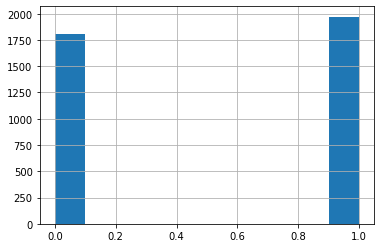

In [45]:
train['subreddit'].hist();

In [46]:
train.head()
#checking to see if all of the above applied to my DataFrame.

,id,author,title,selftext,timestamp,num_comments,ups,subreddit,all_text
0,cc1xgw,Zxnobia,When is it getting serious?,"Hey, I’m relatively new to dating and therefor...",2019-07-11 21:54:37,1,1,0,"When is it getting serious?Hey, I’m relatively..."
1,cc1ro7,kittenlikeunicorn,I am having anxiety about a guy I just started...,"I want to have another date, we’ve already wen...",2019-07-11 21:41:30,1,1,0,I am having anxiety about a guy I just started...
2,cc1ppg,whyisthisthrow,"I feel like shit, and a moron, with nobody to ...",I met this girl around 4 years ago. At the tim...,2019-07-11 21:37:04,1,2,0,"I feel like shit, and a moron, with nobody to ..."
3,cc1p2b,lustinglost,How to deal with dates you don't feel a connec...,So you are dating around with different people...,2019-07-11 21:35:33,1,2,0,How to deal with dates you don't feel a connec...
4,cc1j09,ScaredAboutScars,Am I shallow for screening out introverted guys?,I feel like a terrible person for this but I s...,2019-07-11 21:21:50,14,0,0,Am I shallow for screening out introverted guy...


Save to csv.

In [47]:
# train.to_csv('datasets/clean_big_train.csv')
# commented out to not override original save

Check for descriptive statistics.

In [48]:
train.describe()

,num_comments,ups,subreddit
count,3777.000000,3777.000000,3777.000000
mean,13.374106,36.393699,0.521843
std,109.186185,484.645303,0.499589
min,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000
50%,5.000000,1.000000,1.000000
75%,9.000000,3.000000,1.000000
max,5732.000000,21144.000000,1.000000


Instantiate Regular Expressions Tokenizer.

In [49]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

Tokenize the two text columns, `title` and `selftext`.

In [50]:
train['token_titles'] = train['title'].apply(tokenizer.tokenize)

In [51]:
train['token_selftext'] = train['selftext'].apply(tokenizer.tokenize)

In [52]:
train.head()

,id,author,title,selftext,timestamp,num_comments,ups,subreddit,all_text,token_titles,token_selftext
0,cc1xgw,Zxnobia,When is it getting serious?,"Hey, I’m relatively new to dating and therefor...",2019-07-11 21:54:37,1,1,0,"When is it getting serious?Hey, I’m relatively...","[When, is, it, getting, serious, ?]","[Hey, ,, I, ’m, relatively, new, to, dating, a..."
1,cc1ro7,kittenlikeunicorn,I am having anxiety about a guy I just started...,"I want to have another date, we’ve already wen...",2019-07-11 21:41:30,1,1,0,I am having anxiety about a guy I just started...,"[I, am, having, anxiety, about, a, guy, I, jus...","[I, want, to, have, another, date, ,, we, ’ve,..."
2,cc1ppg,whyisthisthrow,"I feel like shit, and a moron, with nobody to ...",I met this girl around 4 years ago. At the tim...,2019-07-11 21:37:04,1,2,0,"I feel like shit, and a moron, with nobody to ...","[I, feel, like, shit, ,, and, a, moron, ,, wit...","[I, met, this, girl, around, 4, years, ago, .,..."
3,cc1p2b,lustinglost,How to deal with dates you don't feel a connec...,So you are dating around with different people...,2019-07-11 21:35:33,1,2,0,How to deal with dates you don't feel a connec...,"[How, to, deal, with, dates, you, don, 't, fee...","[So, you, are, dating, around, with, different..."
4,cc1j09,ScaredAboutScars,Am I shallow for screening out introverted guys?,I feel like a terrible person for this but I s...,2019-07-11 21:21:50,14,0,0,Am I shallow for screening out introverted guy...,"[Am, I, shallow, for, screening, out, introver...","[I, feel, like, a, terrible, person, for, this..."


Compare distribution of numerical column `num_comments`.

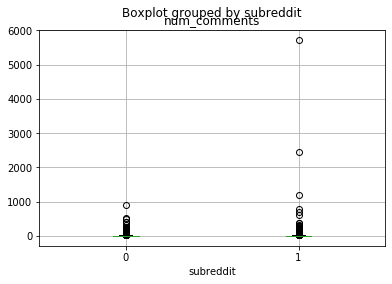

In [53]:
train.boxplot('num_comments', by="subreddit")

Create a function for finding the most frequent words in the `title` and `selftext` columns.

In [54]:
def get_top_n_words(corpus, n=None):
    # instantiate countvectorizer with paramater to remove stop words and fit to data.
    cvec = CountVectorizer(stop_words = 'english').fit(corpus)
    # transform corpus.
    bag_of_words = cvec.transform(corpus)
    # convert to a numpy matrix
    sum_words = bag_of_words.sum(axis=0) 
    #find the words and their counts 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    #sort the words from most frequent to least
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#code adapted from https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

Run a for loop to find the top 20 most frequent words for the `title` column.

In [58]:
common_words = get_top_n_words(train['title'], 20)
for word, freq in common_words:
    print(word, freq)

relationship 310
girlfriend 278
boyfriend 277
girl 273
friend 265
know 251
don 236
dating 212
like 201
date 192
advice 182
help 182
want 180
just 173
need 156
ex 154
feel 150
guy 139
gf 126
friends 121


Run a for loop to find the top 20 most frequent words for the `selftext` column.

In [59]:
common_words = get_top_n_words(train['selftext'], 20)
for word, freq in common_words:
    print (word, freq)


just 6928
like 6410
don 4751
know 4524
time 4223
really 4024
ve 3896
want 3875
feel 3259
said 3110
relationship 2886
things 2589
friends 2523
told 2474
didn 2262
think 2230
going 2183
got 1910
girl 1800
day 1762


Set X (features) and y (target)

In [60]:
X = train['all_text']
y = train['subreddit']

Find the baseline accuracy score. If we always pick the value that is most common variable we'll be right 63.3% of the time.

In [61]:
y.value_counts(normalize=True)

1    0.521843
0    0.478157
Name: subreddit, dtype: float64

Train test split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, #to keep the same balance of y in the test and train data
                                                    random_state = 42)

In [174]:
X_train

610     Why does he keep looking at my social media?We...
2262    I have a problem and idk what to doSo basicall...
2765    I (29M) am having some complicated feelings to...
2349    I (25M) am dating a girl (19F) for a while but...
1733    I’m (18F) starting to relapse into my depressi...
3531    How do I stop giving off the vibe that I'm des...
2972    If anyone would like to chat privately about t...
3036    Told a girl how I feel and haven't talked to h...
2919    Heart broken by somebody I wasn’t even in a re...
3207    Missing my Ex(gf) after getting dumped from 7 ...
978     Dating at work?So I (22F) have recently starte...
1352    Is it okay to “breakup” over text in this situ...
61      How do I stop crushing on girls who are nice t...
811     I (M19) told my crush(F19) that I had blue bal...
3543    How would you slowly ask out/ get to know appr...
408     what do i get my boyfriend?im 16 year old fema...
3006    Was he flirting with me?So due to my social an...
3630    Need s

In [64]:
X_train.dtypes

dtype('O')

In [65]:
X_test.shape

(945,)

In [66]:
X_train.isnull().sum()

0

In [67]:
X_train.head()

610     Why does he keep looking at my social media?We...
2262    I have a problem and idk what to doSo basicall...
2765    I (29M) am having some complicated feelings to...
2349    I (25M) am dating a girl (19F) for a while but...
1733    I’m (18F) starting to relapse into my depressi...
Name: all_text, dtype: object

Here I practiced cleaning the data on just one document first.

In [68]:
# # soup = BeautifulSoup(X_train)
# # print(soup.get_text())

# letters_only = re.sub("[^a-zA-Z]", " ", soup.get_text())   

# #letters_only[0:150]

# lower_case = letters_only.lower()

# # Split lower_case up at each space.
# words = lower_case.split()

# words[0:15]

# print(stopwords.words('english'))

# words = [w for w in words if w not in stopwords.words('english')]

# print(words)

Instantiate Lemmatizer

In [69]:
lemmatizer = WordNetLemmatizer()

Practice lemmatizing

In [70]:
#commented out so as to no cause errors when running all cells

# lem_words = [lemmatizer.lemmatize(i) for i in words]
# len(lem_words)

# for i in range(len(words)):
#     if words[i] != lem_words[i]:
#         print(words[i], lem_words[i])

Instantiate Stemmer

In [71]:
p_stemmer = PorterStemmer()

Practie stemming

In [72]:
#commented out so as to no cause errors when running all cells

# stem_words = [p_stemmer.stem(i) for i in words]

# len(stem_words)

# for i in range(len(words)):
#     if words[i] != stem_words[i]:
#         print(words[i], stem_words[i])

Create a function to turn the posts into a list of words.

In [73]:
def post_to_words(self_text):
    soup_text = BeautifulSoup(self_text).get_text()  #remove HTML
    letters = re.sub("[^a-zA-Z]", " ", soup_text) #remove non-letters
    words = letters.lower().split() #tokenize(split) and make all words lowercase 
    stops = set(stopwords.words('english')) #find stop words 
    keep_words = [w for w in words if w not in stops] #remove stop words 
    # lem_words = [lemmatizer.lemmatize(i) for i in keep_words] 
        
    return(" ".join(keep_words)) #join the words back into one string.

# adapted from Matt Brem's lecture code 

In [74]:
# post_to_words(X_train['selftext'][0])

In [75]:
#test 
# for i in X_train['selftext']:
#     post_to_words(i)

In [76]:
total_posts = train.shape[0]
print(f'There are {total_posts} posts.')

# Initialize an empty list to hold the clean reviews.
clean_train_posts = []
clean_test_posts = []

There are 3777 posts.


In [77]:
print("Cleaning the training set of reddit posts")

j = 0
for i in X_train:
    clean_train_posts.append(post_to_words(i))
j += 1

print("Cleaning the test set of reddit posts")

for test_post in X_test:
    clean_test_posts.append(post_to_words(test_post))
j =+ 1

Cleaning the training set of reddit posts
Cleaning the test set of reddit posts


In [78]:
len(clean_train_posts)

2832

In [79]:
len(clean_test_posts)

945

In [80]:
type(clean_train_posts)

list

Instantiate Count Vectorizer.

In [81]:
cvec = CountVectorizer()

Fit

In [82]:
cvec.fit(clean_train_posts)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Transform

In [83]:
train_features = cvec.transform(clean_train_posts)

In [84]:
test_features = cvec.transform(clean_test_posts)

In [85]:
train_features.shape

(2832, 15370)

Turn it into a DataFrame.

In [86]:
X_train_vec = pd.DataFrame(train_features.toarray(),
                           columns=cvec.get_feature_names())

In [87]:
X_test_vec = pd.DataFrame(test_features.toarray(),
                         columns=cvec.get_feature_names())

In [88]:
X_test_vec.head()

,aa,aau,ab,aback,abandon,abandoned,abandoning,abandonment,abandons,abby,...,zone,zoned,zonei,zones,zoning,zoo,zoology,zoomed,zq,zzog
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Find most frequest words on cleaned data.

code adapted from Susan Li: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [89]:
sum_words = train_features.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [90]:
words_freq[:21]

[('like', 4991),
 ('know', 3652),
 ('time', 3230),
 ('really', 3138),
 ('want', 3077),
 ('would', 2782),
 ('feel', 2639),
 ('get', 2617),
 ('said', 2432),
 ('relationship', 2297),
 ('one', 2067),
 ('friends', 2029),
 ('even', 2000),
 ('told', 1944),
 ('things', 1932),
 ('go', 1918),
 ('back', 1853),
 ('think', 1756),
 ('never', 1753),
 ('going', 1739),
 ('much', 1532)]

Instantiate Logistic Regression.

In [91]:
lr_vec = LogisticRegression()

Fit

In [93]:
lr_vec.fit(X_train_vec, y_train)

/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Train score: 99.5%

In [94]:
lr_vec.score(X_train_vec, y_train)

0.9950564971751412

Test score: 74.6%

In [95]:
lr_vec.score(X_test_vec, y_test)

0.7216931216931217

Cross val score: 74.5%

In [96]:
cross_val_score(lr_vec, X_train_vec, y_train, cv=5).mean()

/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

0.7485740868414915

What if I modify the CVEC parameters?

In [97]:
cvec_12gram = CountVectorizer(ngram_range=(1,2), #will look at individual words and words pairs
                             min_df=3) #words must be in at leat 3 documents to be considered

In [98]:
cvec_12gram.fit(clean_train_posts)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [99]:
X_train_12gram = cvec_12gram.transform(clean_train_posts)

In [100]:
type(X_train_12gram)

scipy.sparse.csr.csr_matrix

In [101]:
X_train_12gram_df = pd.DataFrame(X_train_12gram.toarray(),
                                 columns = cvec_12gram.get_feature_names())


In [102]:
X_train_12gram_df.head()

,aa,ab,aback,abandon,abandoned,abandoning,abandonment,abandons,ability,able,...,yrs,yrs old,ys,ys lt,yup,zero,zone,zoned,zoning,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [103]:
X_test_12gram = cvec_12gram.transform(clean_test_posts)

In [104]:
X_test_12gram_df = pd.DataFrame(X_test_12gram.toarray(),
                               columns = cvec_12gram.get_feature_names())

In [105]:
X_test_12gram_df.head()

,aa,ab,aback,abandon,abandoned,abandoning,abandonment,abandons,ability,able,...,yrs,yrs old,ys,ys lt,yup,zero,zone,zoned,zoning,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
lr_vec.fit(X_train_12gram, y_train)

/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
lr_vec.score(X_train_12gram, y_train)

0.998587570621469

Train score with cvec n_gram range(1,2) and min_df=3:  99.8%

In [108]:
lr_vec.score(X_test_12gram, y_test)

0.7428571428571429

Test score: 75.7%

In [109]:
cross_val_score(lr_vec, X_train_12gram, y_train, cv=5).mean()

/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7634250916317271

Cross val score: 76%

Score increases by one point for test and cross val.

Let's try pipeline next!

In [111]:
pipe = Pipeline([('cvec', CountVectorizer()), 
                ('lr_pipe', LogisticRegression())])


In [112]:
cross_val_score(pipe, X_train, y_train, cv=5).mean()

/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7528181219895573

In [113]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [114]:
pipe.score(X_train, y_train)

0.9978813559322034

In [115]:
pipe.score(X_test, y_test)

0.7343915343915344

In [116]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95, .98],
    'cvec__ngram_range': [(1,1), (1,2), (2,3)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)

gs.fit(X_train, y_train)

print(gs.best_score_)

gs.best_params_

/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7602401129943502


{'cvec__max_df': 0.98,
 'cvec__max_features': 5000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2)}

Gridsearch cross val score: 76%
Best parameters:  
cvec__max_df: 0.98  
cvec__max_features: 5000  
cvec__min_df: 2  
cvec__ngram_range: (1, 2)

In [117]:
gs.score(X_train, y_train)

0.998587570621469

Gridsearch train score: 99.9%

In [118]:
gs.score(X_test, y_test)

0.7365079365079366

Gridsearch test score: 74%

Find the coefficients and features from the gridsearch.

In [120]:
coefs = list(np.exp(gs.best_estimator_.named_steps['lr_pipe'].coef_[0]))

In [121]:
features = gs.best_estimator_.named_steps['cvec'].get_feature_names()

In [122]:
dictionary = dict(zip(features, coefs))

In [123]:
coef_df = pd.DataFrame.from_dict(dictionary, orient='index')

Here I can seee which 20 individual words and/or bi-grams are having the biggest influence on the model.

In [124]:
coef_df[0].sort_values(ascending=False).head(30)

my boyfriend    2.661509
literally       2.349002
wife            2.270028
up and          2.224857
essentially     2.194719
update          2.157443
got the         2.112019
mostly          2.097368
others          2.002450
partner         1.974992
asked if        1.969277
graduate        1.930048
at my           1.928458
is an           1.914759
says            1.905388
white           1.903753
except          1.897766
the other       1.896916
it but          1.893022
someone else    1.892871
affection       1.869167
phone           1.865444
your            1.862859
lied to         1.860568
parents         1.850156
all the         1.839822
end             1.813631
19f             1.811425
that he         1.809776
last night      1.807080
Name: 0, dtype: float64

Let's see what KNN does.

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
knn = KNeighborsClassifier()

In [127]:
knn.fit(X_train_vec, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNN with default paramaters Train score: 74.7%

In [128]:
knn.score(X_train_vec, y_train)

0.7471751412429378

KNN test score predicted worse than my baseline model: 58%

In [129]:
knn.score(X_test_vec, y_test)

0.6264550264550265

KNN cross val score: 56%

In [130]:
cross_val_score(knn, X_train_vec, y_train, cv=5).mean()

0.6041818547919426

KNN did not help and did way worse than my first attempt so I'm going to go back to digging deeper into the features using TfidfVectorizer.

In [131]:
tfidf_vectorizer = TfidfVectorizer(stop_words=['relationship', 'girlfriend', 
                                               'boyfriend', 'friends', 'friends', 
                                               'just', 'like', 'dating', 'know',
                                              'time', 'want', 'really', 'would',
                                              'get', 'feel', 'said', 'things', 'think'],
                                   ngram_range=(1,2),
                                   max_df=0.9,
                                   min_df= 2,
                                   max_features=5000
                                  )

tfidf_vectorizer.fit_transform(clean_train_posts)

<2832x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 259306 stored elements in Compressed Sparse Row format>

Transform

In [132]:
X_train_tfidf = tfidf_vectorizer.transform(clean_train_posts)
X_test_tfidf = tfidf_vectorizer.transform(clean_test_posts) 

Instantiate a new Logistic Regression so as not to override the previous.

In [133]:
lr = LogisticRegression()

Fit the model.

In [134]:
lr.fit(X_train_tfidf, y_train)

/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Train score went down to 88%

In [173]:
X_train_tfidf

<2832x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 259306 stored elements in Compressed Sparse Row format>

In [135]:
lr.score(X_train_tfidf, y_train)

0.8802966101694916

Test score stayed the same at 76%

In [136]:
lr.score(X_test_tfidf, y_test)

0.7576719576719577

Cross val score stayed the same at 79%.

In [137]:
cross_val_score(lr, X_train_tfidf, y_train, cv=5).mean()

/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7913253753992989

In [139]:
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(),
                               columns = tfidf_vectorizer.get_feature_names())

In [140]:
X_train_tfidf_df.shape

(2832, 5000)

In [141]:
tfidf_coefs = (np.exp(lr.coef_)[0])

tfidf_features = tfidf_vectorizer.get_feature_names()

tfidf_coef_dict = dict(zip(tfidf_features, tfidf_coefs))

In [142]:
tfidf_df = pd.DataFrame.from_dict(tfidf_coef_dict, orient='index')

In [143]:
tfidf_df.head()

,0
aback,1.031485
abandon,1.005342
abandoned,1.084123
ability,1.074378
able,1.491365


 These are the most highly predictive words in my

In [145]:
tfidf_df[0].sort_values(ascending=False).head(15)

parents     8.271122
wife        6.659989
love        6.591230
together    6.571395
says        5.413163
break       5.329587
told        5.084645
years       4.997619
phone       4.964687
telling     4.765602
cheated     4.752482
gf          4.619905
dad         4.605839
house       4.463767
married     4.073041
Name: 0, dtype: float64

The word 'parents' is 8.2 times as likely to predict the relationship advice page.

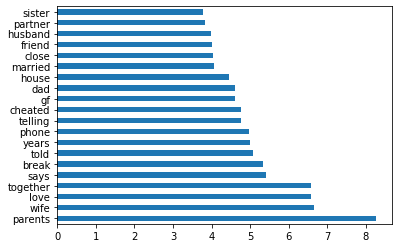

In [146]:
tfidf_df[0].sort_values(ascending=False).head(20).plot(kind='barh')

For my Bayes Model I will use MultinomialNB because it is better than Gaussian and Bernoulli for text processing.  
source: https://medium.com/@awantikdas/a-comprehensive-naive-bayes-tutorial-using-scikit-learn-f6b71ae84431

In [147]:
tfidf_vectorizer_2 = TfidfVectorizer(ngram_range=(2,2),
                                   max_df=0.9,
                                   min_df= 2,
                                   max_features=5000
                                  )

tfidf_vectorizer_2.fit_transform(clean_train_posts)

<2832x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 70736 stored elements in Compressed Sparse Row format>

In [148]:
X_train_2tfidf = tfidf_vectorizer_2.transform(clean_train_posts)
X_test_2tfidf = tfidf_vectorizer_2.transform(clean_test_posts) 

In [149]:
lr_2gram = LogisticRegression()

In [150]:
lr_2gram.fit(X_train_2tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Train score: 86.5%

In [151]:
lr_2gram.score(X_train_2tfidf, y_train)

0.9134887005649718

Test score: 73%

In [152]:
lr_2gram.score(X_test_2tfidf, y_test)

0.7174603174603175

Cross val score: 71.6%

In [153]:
cross_val_score(lr_2gram, X_train_2tfidf, y_train, cv=5).mean()

/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7394161203563206

In [154]:
tfidf2_coefs = (np.exp(lr_2gram.coef_)[0])

tfidf2_features = tfidf_vectorizer_2.get_feature_names()

tfidf2_coef_dict = dict(zip(tfidf2_features, tfidf2_coefs))

In [155]:
tfidf2_df = pd.DataFrame.from_dict(tfidf2_coef_dict, orient='index')

In [156]:
tfidf2_df[0].sort_values(ascending=False).head(20)

even though         5.611317
together years      5.510691
two years           4.634633
best friend         4.570926
feel like           4.291885
fast forward        3.829490
really love         3.818500
long distance       3.805249
married years       3.632188
girlfriend years    3.388480
feels like          3.356721
love much           3.329984
last night          3.274148
say anything        3.177706
ys lt               3.117557
live together       3.048700
best friends        3.022717
living together     2.986601
one year            2.912052
told would          2.879537
Name: 0, dtype: float64

In [157]:
from sklearn.naive_bayes import MultinomialNB

In [158]:
mnb = MultinomialNB()

In [159]:
mnb.fit(X_train_vec, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [160]:
mnb.score(X_train_vec, y_train)

0.8848870056497176

In [161]:
mnb.score(X_test_vec, y_test)

0.7587301587301587

In [162]:
y_pred = mnb.predict(X_test_vec)

In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[341, 111],
       [117, 376]])

The confusion matrix shows we have a somewhat low false predictions. 

In [170]:
train[train['all_text'].str.contains('parents') & (train['subreddit'] == 1)]

,id,author,title,selftext,timestamp,num_comments,ups,subreddit,all_text,token_titles,token_selftext
993,caoli8,horst_from_germany,Please help - My old family is a complete chaos,&amp;#x200B;\n\nPlease help - My old family is...,2019-07-08 18:09:25,0,2,1,Please help - My old family is a complete chao...,"[Please, help, -, My, old, family, is, a, comp...","[&amp;#x200B;, Please, help, -, My, old, famil..."
996,caol6g,littlelunaa12,"I (f,19) was set to be married to my (m,23) ar...","My ex (m,23) and I (f,19) had been dating for ...",2019-07-08 18:08:49,0,1,1,"I (f,19) was set to be married to my (m,23) ar...","[I, (f,19), was, set, to, be, married, to, my,...","[My, ex, (m,23), and, I, (f,19), had, been, da..."
1002,caohoj,lavender-vanilla,My [23F] boyfriend [21M] of two years wants me...,"First post, sorry if this is the wrong place t...",2019-07-08 18:02:04,2,2,1,My [23F] boyfriend [21M] of two years wants me...,"[My, [23F], boyfriend, [21M], of, two, years, ...","[First, post, ,, sorry, if, this, is, the, wro..."
1006,caofgl,dukes1998,I (20M) am worried I may be getting “too into”...,So me and my girlfriend have been officially d...,2019-07-08 17:57:37,0,1,1,I (20M) am worried I may be getting “too into”...,"[I, (20M), am, worried, I, may, be, getting, “...","[So, me, and, my, girlfriend, have, been, offi..."
1010,caoed9,throwaway1306__,Guy [25M] I'm [22F] seeing has a girl [28F] in...,I (22f) started seeing this guy (25m) around S...,2019-07-08 17:55:18,0,1,1,Guy [25M] I'm [22F] seeing has a girl [28F] in...,"[Guy, [25M], I, 'm, [22F], seeing, has, a, gir...","[I, (22f), started, seeing, this, guy, (25m), ..."
1011,caod1d,drawforKeysT_T,My [25/F]friend is having her bday party at my...,I am the only one in my group of friends who h...,2019-07-08 17:52:29,3,1,1,My [25/F]friend is having her bday party at my...,"[My, [25/F]friend, is, having, her, bday, part...","[I, am, the, only, one, in, my, group, of, fri..."
1012,caocq9,DrDrakeRamorayEel,I have a creepy step granddad and I don't know...,"Ok first thing, I was molested by a neighbor w...",2019-07-08 17:51:53,1,1,1,I have a creepy step granddad and I don't know...,"[I, have, a, creepy, step, granddad, and, I, d...","[Ok, first, thing, ,, I, was, molested, by, a,..."
1017,caoc1r,throwitalldown456,I (34F) worry about being too needy/ clingy in...,"In a very long-term relationship, I was always...",2019-07-08 17:50:25,2,2,1,I (34F) worry about being too needy/ clingy in...,"[I, (34F), worry, about, being, too, needy, /,...","[In, a, very, long, -term, relationship, ,, I,..."
1024,cao9wc,PhoenixAria87,"I [30f] don't want to change my last name, my ...",This is just a big confusing mess and I'm not ...,2019-07-08 17:45:58,17,1,1,"I [30f] don't want to change my last name, my ...","[I, [30f], don, 't, want, to, change, my, last...","[This, is, just, a, big, confusing, mess, and,..."
1026,cao9be,throwaway991100221,I am so hurt and confused. Need help,"I will try to make this short.\n\nI 33(F, Afr...",2019-07-08 17:44:45,8,1,1,I am so hurt and confused. Need help I will tr...,"[I, am, so, hurt, and, confused, ., Need, help]","[I, will, try, to, make, this, short, ., I, 33..."


In [172]:
train['all_text'][1002]

'My [23F] boyfriend [21M] of two years wants me to move to a different state with him so he can go to collegeFirst post, sorry if this is the wrong place to post this. It will be long, my apologies.\n\nTo preface this, I have lived on my own and been financially independent for about 4 years and I moved to a new state a few months ago to be closer to my job and am renting a house with one other person for a great price. My job offers excellent benefits, bonuses, and vacation time. It\'s a stressful job and the pay isn\'t amazing but for a first "grown-up job" out of college, I\'m not doing bad at all. Unfortunately, my moving has put a strain on my relationship as now I am about an hour from where my bf lives with his parents and he only sees me once every week or two. Before that, he would come to see me at my apartment every day and stay over most nights. It became an issue to my roommates because he did not help financially at all but that is a different story (still important to me

In [167]:
train['all_text'][989]

'24 F relationship with 23 M ended suddenly. I feel empty and hollow inside, does this feeling go away?I do not know how to navigate the plethora of emotions I have been feeling this past week. I am looking for closure but he is unable to help me with that and I don’t know where else to look for closure. I’m worried about myself- I feel like I am checked out from my life, just going through the motions on autopilot. I have never felt like this before. I miss him constantly, everyday, every moment. Is this normal? \n\nHe meant a lot to me and wants to keep being friends but I don’t think I could be friends which I conveyed to him. What is the best way to deal with this loss? How do I make healthy choices for myself? I am totally lost.'

In [168]:
train['all_text'][994]

"Not with a boy..but I need advice with my MomI don't even know where to start this just happened...\n\n&amp;#x200B;\n\nMy mom logged in to her verizon account (I pay my own phone bill but it's on her service if that makes sense) and saw that my boyfriend and I talk all day everyday and she got really really mad...she said I had to give her my phone. I gave it to her and she started reading and looking through pictures and she just got more and more mad..I ended up having to delete my snapchat..\n\n&amp;#x200B;\n\nShe kicked me out. She let me grab a hoodie and a pair of jeans, but she took my car keys and she kicked me out of the house. I'm 21 years old. I have no one else to turn to, nowhere else to go...what do I do? I'm currently sitting in the library.."

In [169]:
train['all_text'][2959]

"My (18F) younger brother (17M) and I constantly fight over noise complaints. I'm really sick of it at this point, and I'm lost as to what to do.Hey, guys. For several years my younger brother and I have butted heads - he's incredibly loud while I prefer some peace and quiet. We used to spend a lot of time doing normal sibling squabbling stuff when we were younger, but everything has gotten well past that point and we genuinely do not like each other anymore. \n\nI just recently finished my first semester at a good university only 40 mins away, so I don't need a dorm and I can just live at home. I spend a lot of my time studying, preferably with some quiet, but I don't mind noise such as someone watching TV in the living room, or people over, or whatever. I do feel that my brother is excessively loud and inconsiderate, however. Our rooms are right beside each other, and he has a habit of leaving his room door wide open while he blasts music from a bass-boosted speaker, or take calls at